<a href="https://colab.research.google.com/github/cvaranasi1/Algorithms/blob/master/Sonnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
#Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-23 04:00:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-23 04:00:29 (129 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(input_dim=total_words,output_dim=128,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(300,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(200))  #The last layer should not have return_sequences=True
model.add(Dense(1600,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 600)           1029600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 600)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               640800    
_________________________________________________________________
dense_4 (Dense)              (None, 1600)              321600    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5140811   
Total params: 7,543,819
Trainable params: 7,543,819
Non-trainable params: 0
____________________________________________

In [9]:
predictors.shape

(15462, 10)

In [13]:
history = model.fit(predictors, label,batch_size = 64, epochs=500, verbose=1)

Epoch 1/500
242/242 [==============================] - 3s 14ms/step - loss: 6.0804 - accuracy: 0.0515
Epoch 2/500
242/242 [==============================] - 3s 13ms/step - loss: 5.8517 - accuracy: 0.0581
Epoch 3/500
242/242 [==============================] - 3s 13ms/step - loss: 5.7156 - accuracy: 0.0645
Epoch 4/500
242/242 [==============================] - 3s 13ms/step - loss: 5.6348 - accuracy: 0.0654
Epoch 5/500
242/242 [==============================] - 3s 13ms/step - loss: 5.5834 - accuracy: 0.0660
Epoch 6/500
242/242 [==============================] - 3s 13ms/step - loss: 5.5354 - accuracy: 0.0729
Epoch 7/500
242/242 [==============================] - 3s 13ms/step - loss: 5.5051 - accuracy: 0.0703
Epoch 8/500
242/242 [==============================] - 3s 13ms/step - loss: 5.4542 - accuracy: 0.0708
Epoch 9/500
242/242 [==============================] - 3s 13ms/step - loss: 5.4192 - accuracy: 0.0722
Epoch 10/500
242/242 [==============================] - 3s 13ms/step - loss: 5.388

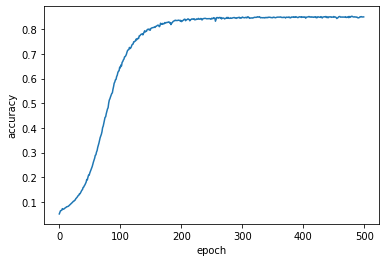

In [25]:
import matplotlib.pyplot as plt
def plot_graph(history, string):
  epochs= range(len(history.history['accuracy']))
  plt.plot(epochs,history.history[string])
  plt.xlabel('epoch')
  plt.ylabel(string)
plot_graph(history,'accuracy')
plt.show()